# JSON and APIs

_September 22, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [2]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?
CLASS NOTES:
<i>API allows us to awquire informaiton thru something. allows us to interact with dat, allows an application to interact with other application
    </i>

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 
CLASS NOTES:
<i>Client is the browser here. The response is XML or JSON and the request is ________________??
    </i>

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.
CLASS NOTES:
<i>Remote server model- you send a reques to the server and then you get a response. part of the server but not the whole thing, its the aspect that takes the requests and sends the responses--- think the waiter in restaurant.
    </i>

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 
CLASS NOTES:
<i>Every website has it's own way of getting data from it.
    A lot of times the API of a services is not publice. u will need authentication. you will need to apply for a key or id. but if we're interested in a service, that does not request you to authenticate...................
    When working with API, look are documentation and find out how the data can be reetrieved.... in yelp GET url
    </i>

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

# what happened here?

400

although the code is right, I did not authenticate myself, thus the error.
Which on reading the documentation, I know that I have to put in my API key 


In [3]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 
import getpass

MY_API_KEY = "julR73peKKcF8UJQNuk4RmO9SaM1OLKnqr0Q33AoiX90zSp-mR_Jrd0pO4jCo0yyTr7JU98zsNBBxmos13103w3Zl7FryEI11TNmts28ke7LSSAEzumW51mvOQ9qX3Yx"


# term = 'Axe Throwing'
term = 'Yoga'
location = 'Brooklyn'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),# space + is also from documentation
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
# building your request code based on the official documentation page
# again, every service you want to get data from may be a little
# different, look at documentation
# some services require a racker? so it may not be as straitfwd as this
# also be sure to read the limit and calls you can make, from docu
response = requests.get(url, headers=headers, params=url_params)

In [27]:
# examine the response object
response.status_code
print(response)
#

<Response [200]>


In [30]:
#need to access this text object to see what is in there
# how are we going to parse the response.text object?
type(response.text)
# print(response.text)

str

In [4]:
yoga = response.text
yoga = json.loads(yoga)
# yoga[0]

In [5]:
yoga

{'businesses': [{'id': 'd-QfVdNPKppkiNwli6Iblw',
   'alias': 'urban-asanas-brooklyn',
   'name': 'Urban Asanas',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/5DvuvWcRRbwYTs1frNx-gg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/urban-asanas-brooklyn?adjust_creative=oOwErKROtVGabr-Nb-ibpA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOwErKROtVGabr-Nb-ibpA',
   'review_count': 31,
   'categories': [{'alias': 'yoga', 'title': 'Yoga'}],
   'rating': 5.0,
   'coordinates': {'latitude': 40.6725567, 'longitude': -73.9506619},
   'transactions': [],
   'location': {'address1': '843 Sterling Pl',
    'address2': 'Fl 2',
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11216',
    'country': 'US',
    'state': 'NY',
    'display_address': ['843 Sterling Pl', 'Fl 2', 'Brooklyn, NY 11216']},
   'phone': '+13473053558',
   'display_phone': '(347) 305-3558',
   'distance': 2442.7260777916476},
  {'id': 'xRWPis9VPJEIEQBwJKMLxQ',
   

so we can use JSON to change this object into something readable or workable

In [9]:
#json.load() to load a JSON file
# json.loads() to load a string
 # working with JSON


# axe_throwing = response.text
# axe_throwing = json.loads(axe_throwing)

In [51]:
# axe_throwing

In [52]:
# cleaning and exploring the data
# want to know what are the keys in the data
# for key in axe_throwing.keys():
#     print(key)

In [34]:
for key in yoga.keys():
    print(key)

businesses
total
region


In [137]:
yoga['businesses']

[{'id': 'd-QfVdNPKppkiNwli6Iblw',
  'alias': 'urban-asanas-brooklyn',
  'name': 'Urban Asanas',
  'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/5DvuvWcRRbwYTs1frNx-gg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/urban-asanas-brooklyn?adjust_creative=oOwErKROtVGabr-Nb-ibpA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOwErKROtVGabr-Nb-ibpA',
  'review_count': 31,
  'categories': [{'alias': 'yoga', 'title': 'Yoga'}],
  'rating': 5.0,
  'coordinates': {'latitude': 40.6725567, 'longitude': -73.9506619},
  'transactions': [],
  'location': {'address1': '843 Sterling Pl',
   'address2': 'Fl 2',
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11216',
   'country': 'US',
   'state': 'NY',
   'display_address': ['843 Sterling Pl', 'Fl 2', 'Brooklyn, NY 11216']},
  'phone': '+13473053558',
  'display_phone': '(347) 305-3558',
  'distance': 2442.7260777916476},
 {'id': 'xRWPis9VPJEIEQBwJKMLxQ',
  'alias': 'veroyoganyc-brooklyn',
  'na

In [53]:
#just looking at what each of the keys hold and what they look like
# axe_throwing['region']

In [54]:
# axe_throwing

In [55]:
# axe_throwing['businesses'][0]

so think about what and how would you make the rows and columns
 pick a good index for the dataframe - that is unique to each value
 
 So here, the rows would be a record of each business and the colummns would be the keys

In [6]:
yoga_businesses = pd.DataFrame.from_dict(yoga['businesses'])
yoga_businesses

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance
0,d-QfVdNPKppkiNwli6Iblw,urban-asanas-brooklyn,Urban Asanas,https://s3-media4.fl.yelpcdn.com/bphoto/5DvuvW...,False,https://www.yelp.com/biz/urban-asanas-brooklyn...,31,"[{'alias': 'yoga', 'title': 'Yoga'}]",5.0,"{'latitude': 40.6725567, 'longitude': -73.9506...",[],"{'address1': '843 Sterling Pl', 'address2': 'F...",+13473053558,(347) 305-3558,2442.726078
1,xRWPis9VPJEIEQBwJKMLxQ,veroyoganyc-brooklyn,Veroyoganyc,https://s3-media4.fl.yelpcdn.com/bphoto/IEjSFu...,False,https://www.yelp.com/biz/veroyoganyc-brooklyn?...,14,"[{'alias': 'yoga', 'title': 'Yoga'}]",4.5,"{'latitude': 40.65969, 'longitude': -73.95392}",[],"{'address1': '208 Midwood St', 'address2': '',...",+16463913266,(646) 391-3266,1476.168481
2,dhg9tWiKlwuoL23eIEel6A,and-yoga-studios-brooklyn-2,And Yoga Studios,https://s3-media1.fl.yelpcdn.com/bphoto/v95cM7...,False,https://www.yelp.com/biz/and-yoga-studios-broo...,36,"[{'alias': 'yoga', 'title': 'Yoga'}]",4.5,"{'latitude': 40.6828, 'longitude': -73.93828}",[],"{'address1': '410 Marcus Garvey Blvd', 'addres...",+19174989300,(917) 498-9300,3390.120962
3,sMxub-E8mWG3kMef4NjUIw,yoga-hell-brooklyn-brooklyn,Yoga Hell Brooklyn,https://s3-media1.fl.yelpcdn.com/bphoto/xWmME_...,False,https://www.yelp.com/biz/yoga-hell-brooklyn-br...,28,"[{'alias': 'yoga', 'title': 'Yoga'}, {'alias':...",4.5,"{'latitude': 40.58846, 'longitude': -73.95231}",[],"{'address1': '2579 East 17 St', 'address2': 'F...",+16468664474,(646) 866-4474,7177.439324
4,5mk_kStr8boSHQboN5Ldpg,amayasana-yoga-brooklyn-2,Amayasana Yoga,https://s3-media4.fl.yelpcdn.com/bphoto/flK2GW...,False,https://www.yelp.com/biz/amayasana-yoga-brookl...,7,"[{'alias': 'yoga', 'title': 'Yoga'}, {'alias':...",5.0,"{'latitude': 40.685504, 'longitude': -73.932266}",[],"{'address1': '269 Stuyvesant Ave', 'address2':...",+15164772904,(516) 477-2904,3737.409296
5,xZNpQn19vydiLvKtDd-FOA,daya-yoga-studio-bushwick,Daya Yoga Studio,https://s3-media3.fl.yelpcdn.com/bphoto/fskTAX...,False,https://www.yelp.com/biz/daya-yoga-studio-bush...,52,"[{'alias': 'yoga', 'title': 'Yoga'}, {'alias':...",4.5,"{'latitude': 40.7057208796381, 'longitude': -7...",[],"{'address1': '360 Jefferson St', 'address2': '...",+17184067912,(718) 406-7912,6062.371457
6,zD56x_lNYi1gooDNmNNtLw,third-root-community-center-brooklyn,Third Root Community Health Center,https://s3-media2.fl.yelpcdn.com/bphoto/1UCtMm...,False,https://www.yelp.com/biz/third-root-community-...,73,"[{'alias': 'acupuncture', 'title': 'Acupunctur...",5.0,"{'latitude': 40.6407941132784, 'longitude': -7...",[],"{'address1': '380 Marlborough Rd', 'address2':...",+17189409343,(718) 940-9343,2474.625733
7,GxqL-IlRZ0diAbC850xL5g,yoga-tribe-brooklyn-brooklyn,Yoga Tribe Brooklyn,https://s3-media4.fl.yelpcdn.com/bphoto/zcm0u6...,False,https://www.yelp.com/biz/yoga-tribe-brooklyn-b...,39,"[{'alias': 'yoga', 'title': 'Yoga'}]",4.0,"{'latitude': 40.6619621, 'longitude': -73.9609...",[],"{'address1': '1120 Washington Ave', 'address2'...",+17183993369,(718) 399-3369,2125.818893
8,m6iFADo3nqd3S3jITLjo_g,sacred-studio-brooklyn-2,Sacred Studio,https://s3-media3.fl.yelpcdn.com/bphoto/X75ekV...,False,https://www.yelp.com/biz/sacred-studio-brookly...,128,"[{'alias': 'yoga', 'title': 'Yoga'}, {'alias':...",4.5,"{'latitude': 40.68883, 'longitude': -73.95596}",[],"{'address1': '197 Clifton Pl', 'address2': '',...",+13477154112,(347) 715-4112,4291.827468
9,-nnWbNS9gaZdfoDAa1OjdQ,align-brooklyn-brooklyn-2,Align Brooklyn,https://s3-media3.fl.yelpcdn.com/bphoto/JmZVMG...,False,https://www.yelp.com/biz/align-brooklyn-brookl...,88,"[{'alias': 'pilates', 'title': 'Pilates'}, {'a...",5.0,"{'latitude': 40.6634053628897, 'longitude': -7...",[],"{'address1': '579 5th Ave', 'address2': 'Fl 2'...",+17187883940,(718) 788-3940,4243.185535


In [58]:
# axe_throwing_df1 = pd.DataFrame(axe_throwing['businesses'])
# axe_throwing_df1.head()

In [59]:
# turn the relevant dataset into a dataframe
# adding .from_dict(dictionary_name) tells that the file is a dictionary object
# which might not always be clear that it is, so might be a best practice
# to just add it, just in case
# axe_throwing_df = pd.DataFrame.from_dict(axe_throwing['businesses'])


In [ ]:
# with open('axe_throwing.json',w) as json_file:
    #json.dump(axe_throwing, json_file)
# df = pd.read_json( file name)
# this json method does not allow us to clean it ????? look at recording

In [ ]:
#for homework: show me your visualization and query for your own made up analysis

Analysis for highest review count and highest rating
Also highest review count and lowest rating
rating descriptive stat
review count descriptive stat
visualize review count by restaurants to see which restaurant got the most reviews

In [138]:
yoga_businesses.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance'],
      dtype='object')

In [133]:
# highest_rev =
# (lambda x: x for x in (yoga_businesses['review_count'].max) & (yoga_businesses['rating'].max))
highest_num_of_reviews = yoga_businesses['review_count'].max()
# highest_rating = yoga_businesses['rating'].max()
most_reviewed_yoga = yoga_businesses.loc[(yoga_businesses['review_count'] == highest_num_of_reviews)]
#                     or (yoga_businesses['rating'] == highest_rating)]
print('{} has the most number of reviews.'.format((most_reviewed_yoga['name'].iloc[0])))
most_reviewed_yoga

Sacred Studio has the most number of reviews.


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance
8,m6iFADo3nqd3S3jITLjo_g,sacred-studio-brooklyn-2,Sacred Studio,https://s3-media3.fl.yelpcdn.com/bphoto/X75ekV...,False,https://www.yelp.com/biz/sacred-studio-brookly...,128,"[{'alias': 'yoga', 'title': 'Yoga'}, {'alias':...",4.5,"{'latitude': 40.68883, 'longitude': -73.95596}",[],"{'address1': '197 Clifton Pl', 'address2': '',...",+13477154112,(347) 715-4112,4291.827468


In [30]:
yoga_businesses['review_count'].max()

128

In [ ]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot? -- look at the distribution


In [10]:
yoga_businesses['name'].nunique()

10

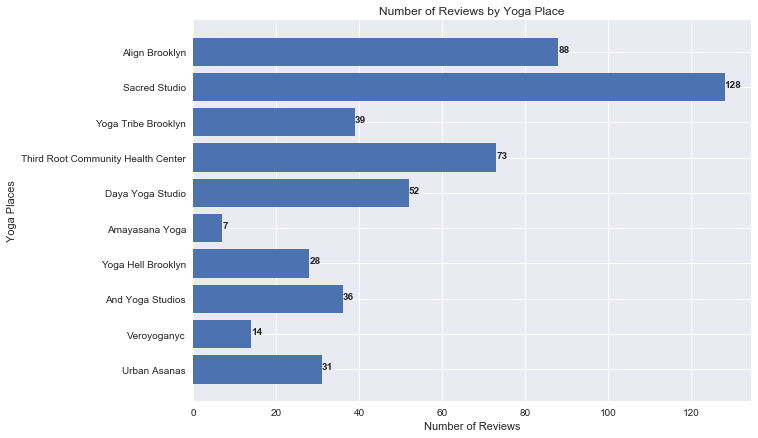

In [29]:
%matplotlib inline
# figure = 
plt.figure(figsize = (10,7))
# ax = compare.add_subplot(121)
# ax1 = compare.add_subplot(122)
x = yoga_businesses['name']
y = yoga_businesses['review_count']
# z = yoga_businesses['rating']
plt.barh(x, y)
for a ,v in enumerate(y):
    plt.text( v, a ,str(v), fontweight = 'bold')

# ax1.plot(x, z)
plt.ylabel('Yoga Places')
# plt.xticks(rotation = 90)
plt.xlabel('Number of Reviews')
plt.title('Number of Reviews by Yoga Place')
# plt.show();
plt.savefig('Reviews.png', bbox_inches = 'tight')
plt.show()

In [ ]:
# query the name of the axe throwing place with the highest review


In [ ]:
# migrate the cleaned data into a sql db

In [ ]:
# can you do some other queries using sql/pandas?

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)